# Assignmnet 3 (100 + 5 points)

**Name:** Kotoomi Fukushima<br>
**Email:** kof6267@thi.de<br>
**Group:** A <br>
**Hours spend *(optional)* :** <br>

<h3> Submission </h3>

Submit your files in a zip file : firstname_lastname.zip. !!!

# Question 1: Word Embeddings (Word2Vec) *(30 points)*

Word2Vec is a popular technique in natural language processing (NLP) for learning vector representations of words, also known as word embeddings. These embeddings capture semantic relationships between words, such that words used in similar contexts are placed close to each other in the vector space.

There are two main architectures for Word2Vec:

- **Continuous Bag-of-Words (CBOW):** Predicts the current word based on its context (surrounding words).
- **Skip-Gram:** Predicts surrounding words given the current word.

In this tutorial, you will implement a simplified version of the Skip-Gram model using Python and train it on a given dataset.

---

## Your Task:

#### **Data Preparation:**

- Given a corpus of text (word2vec_dataset.en) attached, preprocess the data to create training examples suitable for a Skip-Gram model.
- Implement functions to tokenize the text, build a vocabulary, and generate input-output pairs for training.

#### **Implement a Simple Skip-Gram Model:**

- implement a simple neural network representing the Skip-Gram architecture.
- The model should learn word embeddings by training on the generated input-output pairs.

#### **Train the Model:**

- Train your Skip-Gram model on the prepared data.
- Use appropriate loss functions and optimization algorithms.

#### **Visualize Word Embeddings:**

- After training, visualize the learned word embeddings in 2D space using techniques like PCA or t-SNE.
- Plot the words to observe how similar words are positioned relative to each other.


#### **Notes:**

- If the training process is slow, consider reducing the size of the dataset to improve training speed.

### Allowed Libraries:
- **collections** for building vocabulary.
- **NumPy:** For numerical computations.
- **Matplotlib:** For plotting and visualization.
- **scikit-learn (sklearn):** For dimensionality reduction techniques like PCA or t-SNE, evaluation metrics.
- **TensorFlow or PyTorch** if you prefer to implement the model using these frameworks. However, since the challenge aims to be simple and educational, using NumPy suffices.




In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA


def read_file(path):
    with open(path, "r", encoding = "utf-8") as file:
        text = file.read().lower().replace("\n", " ") #convert to lowercase and remove new lines
    return text

def clean_text(text): #remove punctuations and symbols
    clean_text = "" #initialize clean text
    for char in text:
        if char.isalnum() or char.isspace():
            clean_text += char
        else:
            clean_text += ""
    return clean_text

def load_and_prepare(path, max_tokens=5000):
    text = read_file(path)
    cleaned = clean_text(text)
    tokens = cleaned.split() #list of words
    return tokens[:max_tokens]

def build_vocab(tokens, max_vocab_size=2000):
    word_count = Counter(tokens)

    most_common_words = [word for word, count in word_count.most_common(max_vocab_size)]
    
    #assign unique ID
    word2idx = {word: idx for idx, word in enumerate(most_common_words)}
    idx2word = {idx: word for word, idx in word2idx.items()}

    return word2idx, idx2word

def generate_training_pair(tokens, word2idx, windowsize=2):
    training_pairs = []
    
    for i, word in enumerate(tokens):
        for j in range(i - windowsize, i + windowsize + 1):
            if j != i and 0 <= j < len(tokens):
                context_word = tokens[j]
                pair = (word2idx[word], word2idx[context_word])
                training_pairs.append(pair)
                
    return training_pairs

def initialize_parameters(vocab_size, embedding_dim):
    # Word embedding matrix (input -> hidden)
    W1 = np.random.randn(vocab_size, embedding_dim) * 0.01

    # Output weight matrix (hidden -> output)
    W2 = np.random.randn(embedding_dim, vocab_size) * 0.01

    return W1, W2
    
def softmax(x):
    e_x = np.exp(x - np.max(x))  
    return e_x / np.sum(e_x)

def forward_backward(center_idx, context_idx, W1, W2, vocab_size, learning_rate=0.01):
    # One-hot encode center word
    x = np.zeros(vocab_size)
    x[center_idx] = 1

    # Forward pass
    h = W1.T @ x  # Hidden layer: (embedding_dim,)
    u = W2.T @ h  # Output scores: (vocab_size,)
    y_pred = softmax(u)

    # Compute loss 
    loss = -np.log(y_pred[context_idx])

    # Backpropagation
    # Gradient of output
    y_true = np.zeros(vocab_size)
    y_true[context_idx] = 1
    e = y_pred - y_true  # error

    # Gradient for W2 and W1
    dW2 = np.outer(h, e)
    dW1 = np.outer(x, W2 @ e)

    # Update weights
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2

    return loss
    
def train_skipgram(training_pairs, vocab_size, embedding_dim=50, epochs=5, learning_rate=0.01):
    W1, W2 = initialize_parameters(vocab_size, embedding_dim)

    for epoch in range(epochs):
        total_loss = 0
        for center_idx, context_idx in training_pairs:
            loss = forward_backward(center_idx, context_idx, W1, W2, vocab_size, learning_rate)
            total_loss += loss
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")
        avg_loss = total_loss / len(training_pairs)
        print(f"Epoch {epoch+1}, Avg Loss: {avg_loss:.4f}")

    
    return W1  # W1 holds the learned embeddings

def visualize_embeddings(W1, idx2word, top_n):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(W1[:top_n])  

    plt.figure(figsize=(12, 8))
    for i in range(top_n):
        plt.scatter(reduced[i, 0], reduced[i, 1])
        plt.annotate(idx2word[i], (reduced[i, 0], reduced[i, 1]))
    plt.title("Word2Vec Embedding Visualization (PCA)")
    plt.show()

path = "word2vec_dataset.en"
tokens = load_and_prepare(path)
word2idx, idx2word = build_vocab(tokens)
training_pairs = generate_training_pair(tokens,word2idx)
vocab_size = len(word2idx)
W1 = train_skipgram(training_pairs, vocab_size, embedding_dim=50, epochs=10, learning_rate=0.01)


# Help; chatGPT

Epoch 1, Loss: 149402.6265
Epoch 1, Avg Loss: 7.4724
Epoch 2, Loss: 148487.0472
Epoch 2, Avg Loss: 7.4266
Epoch 3, Loss: 144630.4359
Epoch 3, Avg Loss: 7.2337
Epoch 4, Loss: 141264.3870
Epoch 4, Avg Loss: 7.0653
Epoch 5, Loss: 137824.3093
Epoch 5, Avg Loss: 6.8933
Epoch 6, Loss: 134578.1324
Epoch 6, Avg Loss: 6.7309
Epoch 7, Loss: 131875.8667
Epoch 7, Avg Loss: 6.5958
Epoch 8, Loss: 129763.1364
Epoch 8, Avg Loss: 6.4901
Epoch 9, Loss: 128109.3605
Epoch 9, Avg Loss: 6.4074
Epoch 10, Loss: 126816.7079
Epoch 10, Avg Loss: 6.3427


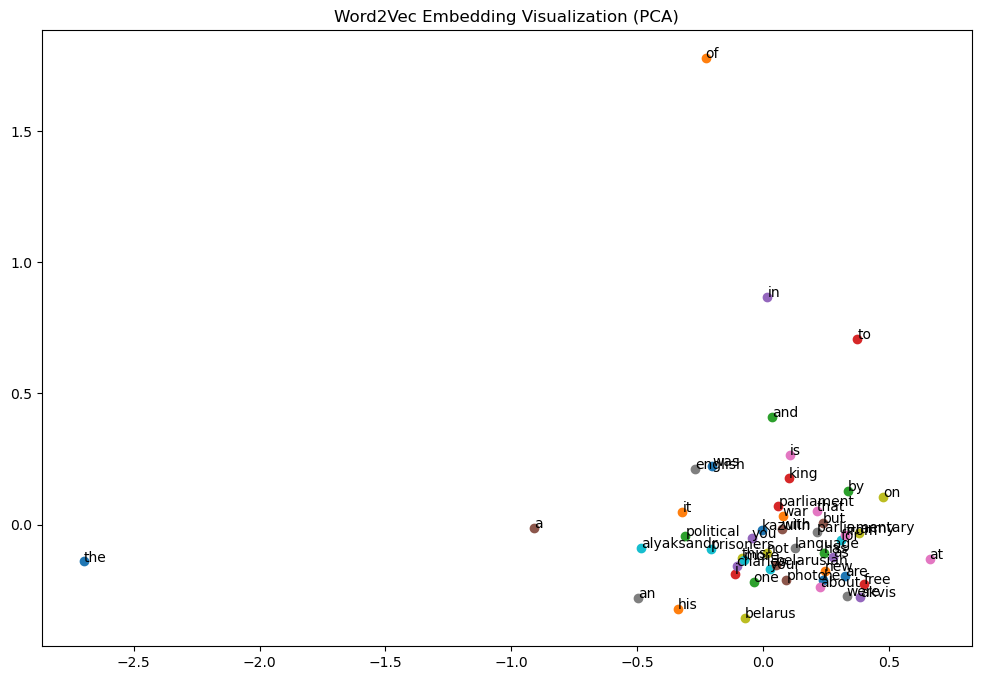

In [16]:
visualize_embeddings(W1, idx2word, top_n=50)


# Question 2: Transformer model *(70 points)*

As a Machine Learning engineer at a tech company, you were given a task to develop a machine translation system that translates **English (source) to German (Target)**. You have the freedom to select any dataset for training the model. Use a small subset of data as a validation dataset and report the BLEU score on the validation set.

Also, provide a short description of your transformer model architecture, hyperparameters, and training (also provide the train-validation loss curve). Write your findings and analysis in paragraphs.


**Dataset**

Here are some of the parallel datasets (see Datasets and Resources file):
* Europarl Parallel corpus - https://www.statmt.org/europarl/v7/de-en.tgz
* News Commentary - https://www.statmt.org/wmt14/training-parallel-nc-v9.tgz (use DE-EN parallel data)
* Common Crawl corpus - https://www.statmt.org/wmt13/training-parallel-commoncrawl.tgz (use DE-EN parallel data)

You can also use other datasets of your choice. In this case please add the dataset you used to the submission zip file.

In the above datasets, **'.en'** file has the text in English, and **'.de'** file contains their corresponding German translations.



## Notes:
1. You can also consider using a small subset of the dataset if the training dataset is large
2. Sometimes you can also get out of memory errors while training, so choose the hyperparameters carefully.
3. Your training will be much faster if you use a GPU (Edit -> Notebook settings). If you are using a CPU, it may take several hours or even days. (you can also use Google Colab GPUs for training. link: https://colab.research.google.com/)
4. It is a best practise to leverage vector representations learned in Q1 in your training as starting point for the embedding layer.




In [ ]:
# My answer is in the different file named assignment_3_q2.ipynb in the same folder


[]


A


### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*